# **Visualizing astronomical data from the Hipparcos catalog in a Hertzsprung-Russell diagram**
*The Hipparcos catalog data was obtained [here](https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=I/239/hip_main&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa)*

*This code uses the entirety of the dataset available on the VizieR website*

### **Importing the required python libraries**

The following code imports the required python modules that will be used throughout the program

In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

## **Loading the dataset with only the required columns into a numpy array from FITS file**

Here, we use the in-built functions of the astropy python module to extract data from the FITS file and store it in a numpy ndarray.

In [ ]:
filepath = 'asu_999999.fit'
hdul = fits.open(filepath)

# from 'hdul.info()' we can see that the first extension HDU contains the data table
df_full = hdul[1].data

# checking names of columns -->
# df_full_cols = hdul[1].columns
# print(df_full_cols.names)
# filtering out only the requires fields into a separate numpy array and calculating abs mag -->
col_HIP = df_full.field(2)
col_VMag = df_full.field(5)
col_Plx = df_full.field(8)
col_BV = df_full.field(12)
# using 'where' to check for zeroes which might appear inside the np.
col_AbsMag = df_full.field(5) + 5 * np.log10((df_full.field(8)/100), where=(df_full.field(8)/100)>0)
data = np.stack((col_HIP, col_VMag, col_Plx, col_BV, col_AbsMag), axis=1)

## **Data pre-processing (cleaning data)**

Here, we use the 'isnan' function (from numpy), to search for null values in the data table and remove the rows which contain null values.

A better approach that can be implemented for removing numerical null values is to replace the null value with the mean/median of the data in the particular column.

The dataset is then transposed using the inbuilt 'transpose' functions in numpy to make it easier to reference the data when plotting the data points.

In [ ]:
data = data[~np.isnan(data).any(axis=1)]
data_T = np.transpose(data)

## **Plotting the data using matplotlib**

Here, we create and define the plotting parameters for the HR diagram. A scatter diagram with the absolute magnitude (on the y-axis) and the B-V color intensity (on the x-axis) is then plotted to obtain the Hertzsprung-Russell diagram of all the stars present in the Hipparcos Catalog

*NOTE : The absolute magnitude of a star is representative (exponentially proportional) of its luminosity and the B-V color is directly correlated to the spectral type/class of the star. Hence, these values can be plotted to obtain the H-R diagram*

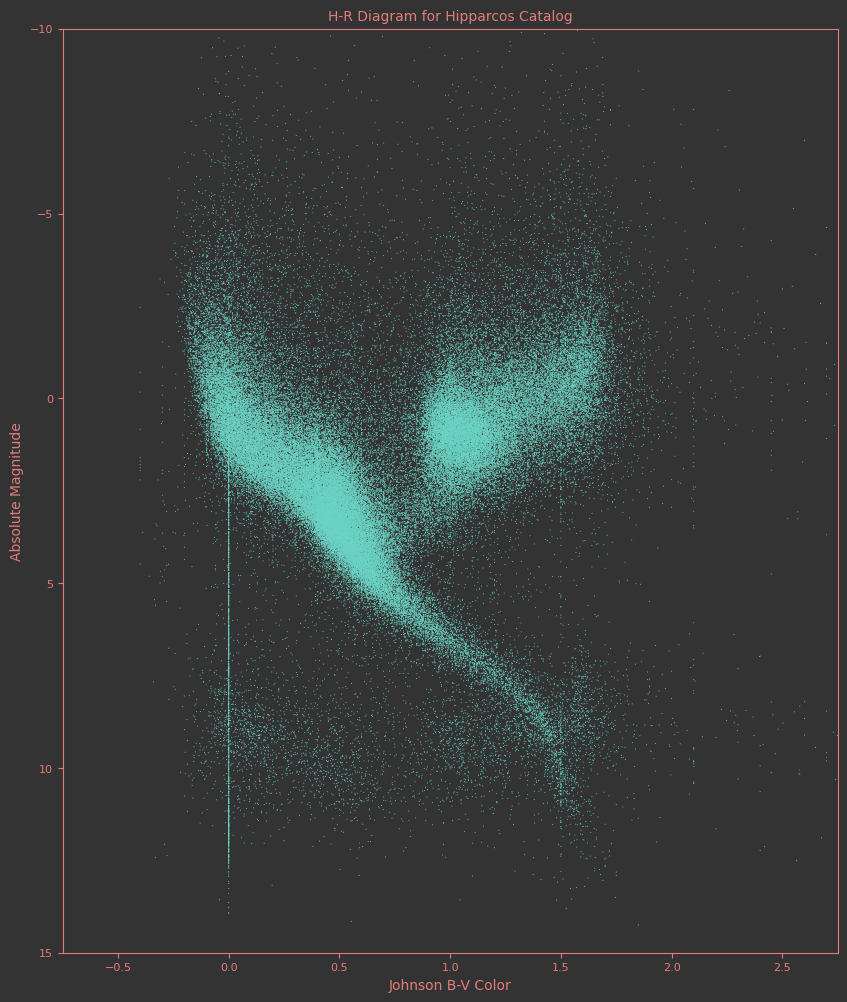

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
ax.set_xlim(-0.75,2.75)
ax.set_ylim(15, -10)
ax.set_facecolor('#333333')
fig.patch.set_facecolor('#333333')
ax.set_title('H-R Diagram for Hipparcos Catalog')
ax.set_xlabel('Johnson B-V Color')
ax.set_ylabel('Absolute Magnitude')
ax.xaxis.label.set_color('#e27c7c')
ax.yaxis.label.set_color('#e27c7c')
ax.title.set_color('#e27c7c')
ax.title.set_fontsize(10)
ax.spines['left'].set_color('#e27c7c')
ax.spines['top'].set_color('#e27c7c')
ax.spines['bottom'].set_color('#e27c7c')
ax.spines['right'].set_color('#e27c7c')
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.scatter(data_T[3], data_T[4], s=.5, edgecolors='none', color='#6cd4c5')
ax.tick_params(axis='both', labelsize=8, colors='#e27c7c')
plt.show()

#closing the header-data unit opened at the beginning
hdul.close()